In [1]:
#Handle Imports
from os import listdir
from os.path import isfile, join
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

from __future__ import print_function
np.random.seed(1337)  # for reproducibility


import cv2
import numpy as np
import math
import pylab as pl
import matplotlib.pyplot as plt
import random

%matplotlib inline

Using TensorFlow backend.


In [2]:
'''
This module will handle pre-processing such as labeling inages as positives and negatives.  If you would like to use
the data from the folders just download them and change the paths.
'''

#Read all images from folder.
pospath = "/home/collin/Desktop/Positives/"
positives = [f for f in listdir(pospath) if isfile(join(pospath, f))]

negpath = "/home/collin/Desktop/Negatives/"
negatives = [f for f in listdir(negpath) if isfile(join(negpath, f))]

#create array to hold all data
numImages = len(positives) + len(negatives)
data = np.zeros((numImages, 1025))

#choose 80/20 ratio for splitting data because of Pareto principle
split = math.floor(numImages * 0.8)

#load Positives
for i in range(len(positives)):
    path = pospath + positives[i]
    particle = cv2.imread(path)
    particle = cv2.cvtColor(particle, cv2.COLOR_BGR2GRAY)
    
    particle = particle.flatten()
    particle = np.insert(particle, 1024, 1)
    data[i] = particle
    
#load Negatives
for i in range(len(negatives)):
    path = negpath + negatives[i]
    particle = cv2.imread(path)
    particle = cv2.cvtColor(particle, cv2.COLOR_BGR2GRAY)
    
    particle = particle.flatten()
    particle = np.insert(particle, 1024, 0)
    data[len(positives) + i] = particle

#shuffle examples
np.random.shuffle(data)

#split data into training and testing sets
X_train = data[0:split, 0:1024]
y_train = data[0:split, 1024]
X_test = data[split:,0:1024]
y_test = data[split:, 1024]

#reshape images to be routed to classifier
X_train = np.reshape(X_train, (split, 32, 32))
X_test = np.reshape(X_test, (numImages - split, 32, 32))



/home/collin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:43: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/collin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:44: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/collin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:45: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/collin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:46: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/collin/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


In [3]:
'''This module will set up hyper parameters and  normalize the data'''

batch_size = 10
nb_classes = 2
nb_epoch = 80

# input image dimensions
img_rows, img_cols = 32, 32
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (70, 32, 32, 1)
70 train samples
18 test samples


/home/collin/anaconda2/lib/python2.7/site-packages/keras/utils/np_utils.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Y[i, y[i]] = 1.


In [4]:
'''Model creation and fitting'''

model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])



Train on 70 samples, validate on 18 samples
Epoch 1/80
70/70 [==============================] - 0s - loss: 0.6891 - acc: 0.5143 - val_loss: 0.7085 - val_acc: 0.4444
Epoch 2/80
70/70 [==============================] - 0s - loss: 0.6930 - acc: 0.5714 - val_loss: 0.7028 - val_acc: 0.4444
Epoch 3/80
70/70 [==============================] - 0s - loss: 0.6895 - acc: 0.5000 - val_loss: 0.7208 - val_acc: 0.4444
Epoch 4/80
70/70 [==============================] - 0s - loss: 0.7052 - acc: 0.5429 - val_loss: 0.7022 - val_acc: 0.4444
Epoch 5/80
70/70 [==============================] - 0s - loss: 0.6990 - acc: 0.5571 - val_loss: 0.6975 - val_acc: 0.4444
Epoch 6/80
70/70 [==============================] - 0s - loss: 0.6858 - acc: 0.5857 - val_loss: 0.7035 - val_acc: 0.4444
Epoch 7/80
70/70 [==============================] - 0s - loss: 0.6926 - acc: 0.5714 - val_loss: 0.7034 - val_acc: 0.4444
Epoch 8/80
70/70 [==============================] - 0s - loss: 0.6955 - acc: 0.5714 - val_loss: 0.6975 - val_

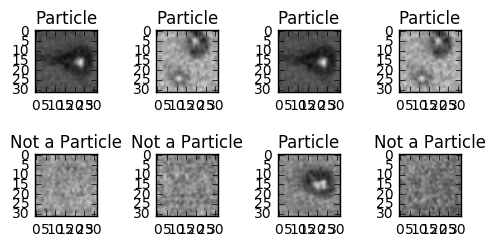

In [34]:
'''Visualize Predictions'''

fig = plt.figure()
fig.subplots_adjust(hspace=1)

predictions = model.predict_classes(X_test, batch_size=32, verbose=0)

displays = 8

for i in range(displays):
    x = random.sample(xrange(1,len(X_test)), displays)
    img = np.squeeze(X_test[x[i]])
    ax = plt.subplot(341 + i)
    if(predictions[x[i]] == 1):
        ax.set_title("Particle")
    else:
        ax.set_title("Not a Particle")
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')

plt.show()